# Bayes classifier-Unimodal Gaussian density 

##  Covariance matrix is diagonal and is different for each class

In [2]:
import numpy as np

# Load data function
def load_data(filename):
    data = np.loadtxt(filename)
    X = data[:, :2]  # First two columns are features
    y = data[:, 2].astype(int)  # Third column is class label
    return X, y

# Gaussian Bayes Classifier class
class GaussianDensityBayesClassifier:
    def __init__(self):
        self.class_stats = {}
        self.priors = {}

    def fit(self, X, y):
        classes = np.unique(y)
        for cls in classes:
            X_class = X[y == cls]
            mean = X_class.mean(axis=0)
            var = X_class.var(axis=0)  # Diagonal variance (each feature variance)
            self.class_stats[cls] = {"mean": mean, "var": var}
            self.priors[cls] = len(X_class) / len(X)

    def gaussian_density(self, x, mean, var):
        # Calculate Gaussian density function with diagonal covariance
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return exponent / np.sqrt(2 * np.pi * var)

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = {}
            for cls, stats in self.class_stats.items():
                prior = self.priors[cls]
                mean = stats["mean"]
                var = stats["var"]
                # Calculate likelihood using Gaussian density
                likelihood = np.prod(self.gaussian_density(x, mean, var))
                posteriors[cls] = prior * likelihood
            # Select the class with the highest posterior probability
            predictions.append(max(posteriors, key=posteriors.get))
        return np.array(predictions)

    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Load the data
X_train, y_train = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
X_val, y_val = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt")
X_test, y_test = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Train the classifier
classifier = GaussianDensityBayesClassifier()
classifier.fit(X_train, y_train)

# Evaluate on validation and test sets
val_accuracy = classifier.evaluate(X_val, y_val)
test_accuracy = classifier.evaluate(X_test, y_test)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Validation Accuracy: 95.78%
Test Accuracy: 93.00%


### Decision Regions with Training Data

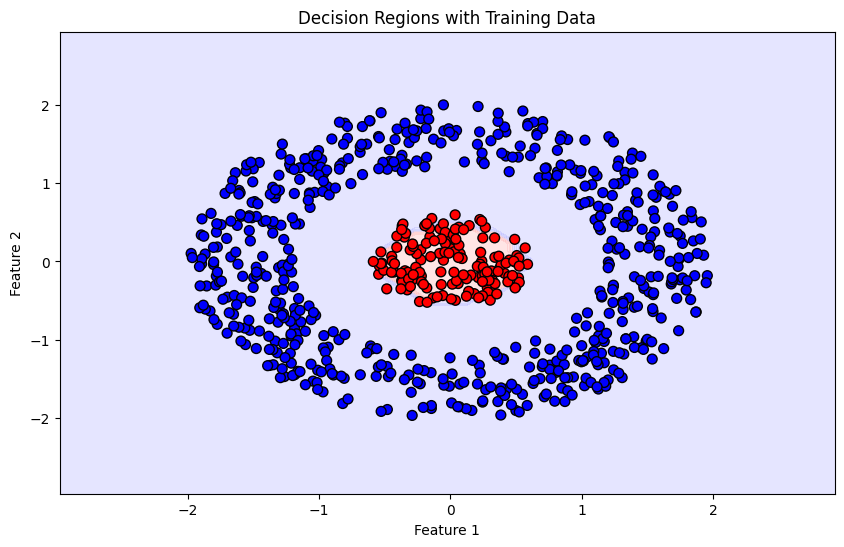

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision regions
def plot_decision_regions(X, y, classifier):
    # Define the color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    # Define the bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict classes for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    
    # Scatter plot for the training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Regions with Training Data")
    plt.show()


# Train the classifier
classifier = GaussianDensityBayesClassifier()
classifier.fit(X_train, y_train)

# Plot the decision regions with training data superposed
plot_decision_regions(X_train, y_train, classifier)


### Decision Regions with Testing Data

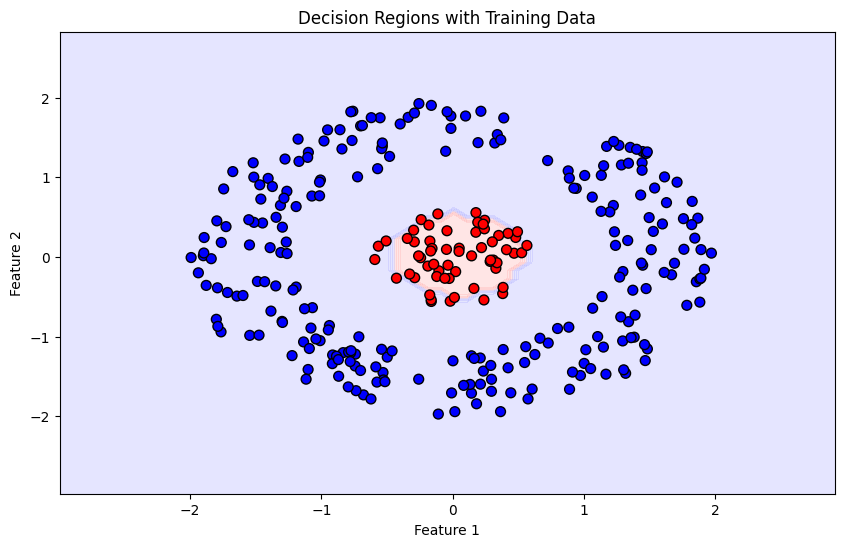

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Function to plot decision regions
def plot_decision_regions(X, y, classifier):
    # Define the color maps for plotting
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    # Define the bounds of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict classes for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    
    # Scatter plot for the training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Regions with Training Data")
    plt.show()


# Train the classifier
classifier = GaussianDensityBayesClassifier()
classifier.fit(X_test, y_test)

# Plot the decision regions with training data superposed
plot_decision_regions(X_test, y_test, classifier)


### Evaluation metrics

In [7]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Function to calculate classification metrics
def classification_metrics(y_true, y_pred, classes):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Precision, Recall, F-measure for each class
    precision = precision_score(y_true, y_pred, average=None, labels=classes)
    recall = recall_score(y_true, y_pred, average=None, labels=classes)
    fmeasure = f1_score(y_true, y_pred, average=None, labels=classes)
    
    # Mean Precision, Recall, F-measure
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_fmeasure = np.mean(fmeasure)
    
    return accuracy, precision, recall, fmeasure, mean_precision, mean_recall, mean_fmeasure


# Predict on the test data
y_pred = classifier.predict(X_test)

# Get the classes
classes = np.unique(y_test)

# Calculate metrics
accuracy, precision, recall, fmeasure, mean_precision, mean_recall, mean_fmeasure = classification_metrics(y_test, y_pred, classes)

# Print the results
print(f"Classification Accuracy: {accuracy * 100:.2f}%")
for i, cls in enumerate(classes):
    print(f"Class {cls} - Precision: {precision[i]:.2f}, Recall: {recall[i]:.2f}, F-measure: {fmeasure[i]:.2f}")
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F-measure: {mean_fmeasure:.2f}")


Classification Accuracy: 94.33%
Class 1 - Precision: 1.00, Recall: 0.72, F-measure: 0.83
Class 2 - Precision: 0.93, Recall: 1.00, F-measure: 0.97
Mean Precision: 0.97
Mean Recall: 0.86
Mean F-measure: 0.90


### Confusion matrix

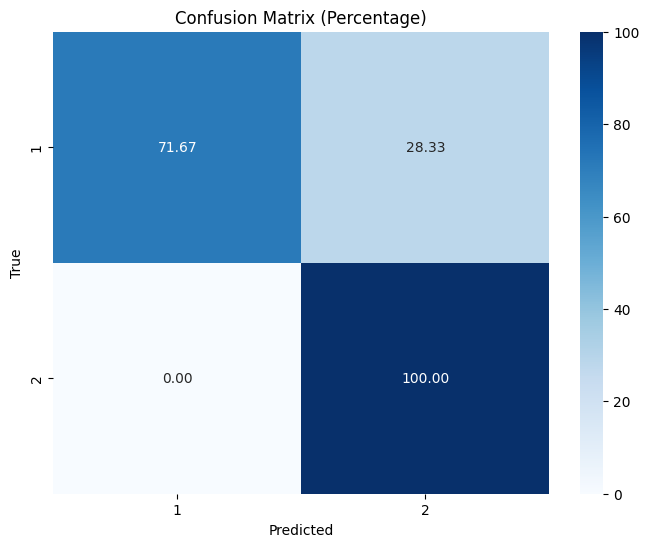

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to compute the confusion matrix in percentage
def confusion_matrix_percentage(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    return cm_percentage

# Function to plot confusion matrix
def plot_confusion_matrix(cm_percentage, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix (Percentage)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Predict on the test data
y_pred = classifier.predict(X_test)

# Compute the confusion matrix as percentage
cm_percentage = confusion_matrix_percentage(y_test, y_pred)

# Define class labels
class_names = np.unique(y_test)

# Plot the confusion matrix
plot_confusion_matrix(cm_percentage, class_names)
